### An Analytic Report and Research Proposal on a dataset of your choosing

#### FEMA

https://www.kaggle.com/fema/federal-disasters/

The president can declare an emergency for any occasion or instance when the President determines federal assistance is needed. Emergency declarations supplement State and local or Indian tribal government efforts in providing emergency services, such as the protection of lives, property, public health, and safety, or to lessen or avert the threat of a catastrophe in any part of the United States. The total amount of assistance provided for in a single emergency may not exceed $5 million.

The president can declare 

A major disaster declaration provides a wide range of federal assistance programs for individuals and public infrastructure, including funds for both emergency and permanent work.


Interesting questions

- What type of disaster is the most commonly declared by FEMA? 
- Which disasters or emergencies have lasted the longest? 
- What disaster was declared in the most counties or states? 
- Has the number of disasters declared by FEMA risen or fallen over time?

1 - Describe your dataset. 
Describe and explore your dataset in the initial section of your Report. 

* What does your data contain and what is its background? 

This dataset include a record for every federal emergency or disaster declared by the President of the United States since 1953.

* Where does it come from? 
This dataset is taken from Kaggle 

* Why is it interesting or significant? 

It is interesting because although we hear about disaster and state of emergencies, not too many people understand what that is. A major disaster for any natural event, including any hurricane, tornado, storm, high water, wind-driven water, tidal wave, tsunami, earthquake, volcanic eruption, landslide, mudslide, snowstorm, or drought, or, regardless of cause, fire, flood, or explosion, that the President determines has caused damage of such severity that it is beyond the combined capabilities of state and local governments to respond. 

I live in FL and we battle hurricane every year as the natural disaster. So, this is significant to me to see the trend of this natural disaster and more importantly, how has it changed since 1953. 

* Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

The summary statistics that is conducted here include 
 - What is the top 5 types of disasters caused since 1953
 - Considering the disterer type "Hurricane", what are the different hurricane titles we encountered since 1953


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from dateutil.relativedelta import relativedelta
from datetime import date


In [2]:
# making sure that the data is there and it looks good to do some analysis

data = pd.read_csv('datasets/FEMA-database.csv')

#data.info()
data.head(25)
#data.dtypes
# what size data are we looking at
#print(data.shape)


,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,Individual_Assistance_Program,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes
5,DR-6,Disaster,06/09/1953,MI,NaN,Tornado,Tornado,06/09/1953,06/09/1953,03/30/1956,Yes,No,Yes,Yes
6,DR-7,Disaster,06/11/1953,MA,NaN,Tornado,Tornado,06/11/1953,06/11/1953,06/01/1956,Yes,No,Yes,Yes
7,DR-8,Disaster,06/11/1953,IA,NaN,Flood,Flood,06/11/1953,06/11/1953,11/01/1955,Yes,No,Yes,Yes
8,DR-9,Disaster,06/19/1953,TX,NaN,Flood,Flood,06/19/1953,06/19/1953,01/01/1958,Yes,No,Yes,Yes
9,DR-11,Disaster,07/02/1953,NH,NaN,Fire,Forest Fire,07/02/1953,07/02/1953,02/01/1956,Yes,No,Yes,Yes


In [3]:
# changing to date format
data['End_Date'] = pd.to_datetime(data['End_Date'])
data['Start_Date'] = pd.to_datetime(data['Start_Date'])
data['Declaration_Date'] = pd.to_datetime(data['Declaration_Date'])
data['Close_Date'] = pd.to_datetime(data['Close_Date'])


#Calculating the Average of Start to End | End to Close and Start To Close Date
data['Start_End_duration'] = (data['End_Date'] - data['Start_Date'])/np.timedelta64(1,'D')
data['Start_End_duration'] = data['Start_End_duration'].add(1)

data['End_Close_duration'] = (data['Close_Date'] - data['End_Date'])/np.timedelta64(1,'D')
data['End_Close_duration'] = data['End_Close_duration'].add(1)


data['Declaration_Close_duration'] = (data['Close_Date'] - data['Declaration_Date'])/np.timedelta64(1,'D')
data['Declaration_Close_duration'] = data['Declaration_Close_duration'].add(1)

#data
#data.info()


Text(0, 0.5, 'Total Count of Declarations')

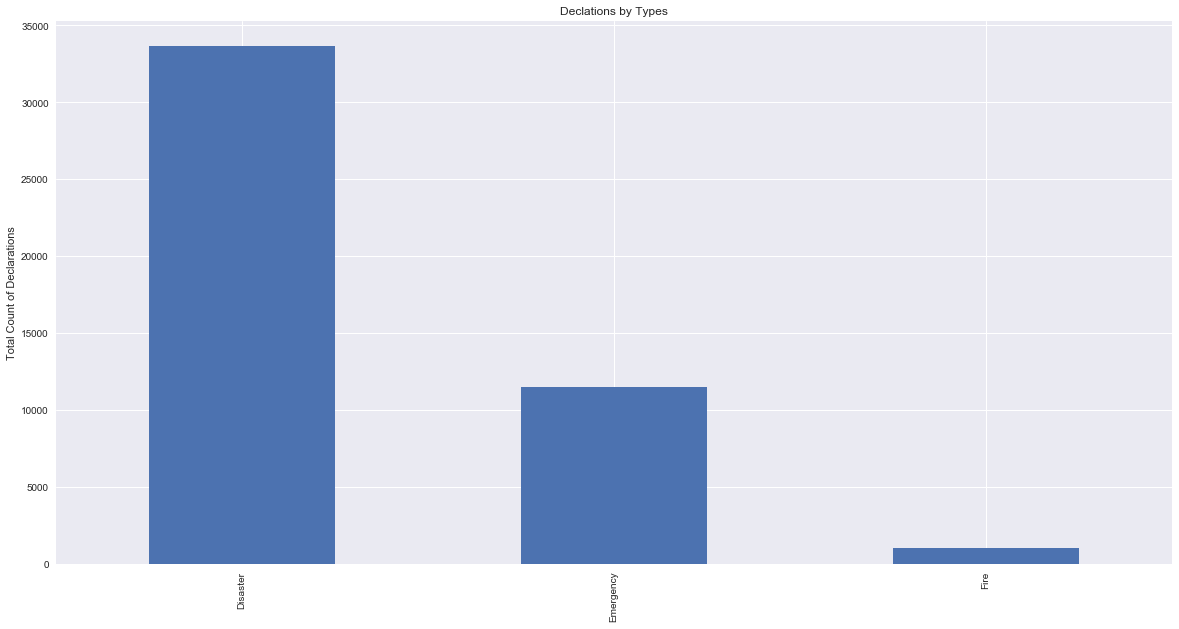

In [4]:
# what are the diffent emergency declatioon types

data.Declaration_Type.value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Declations by Types')
plt.ylabel('Total Count of Declarations')


Text(0, 0.5, 'Count')

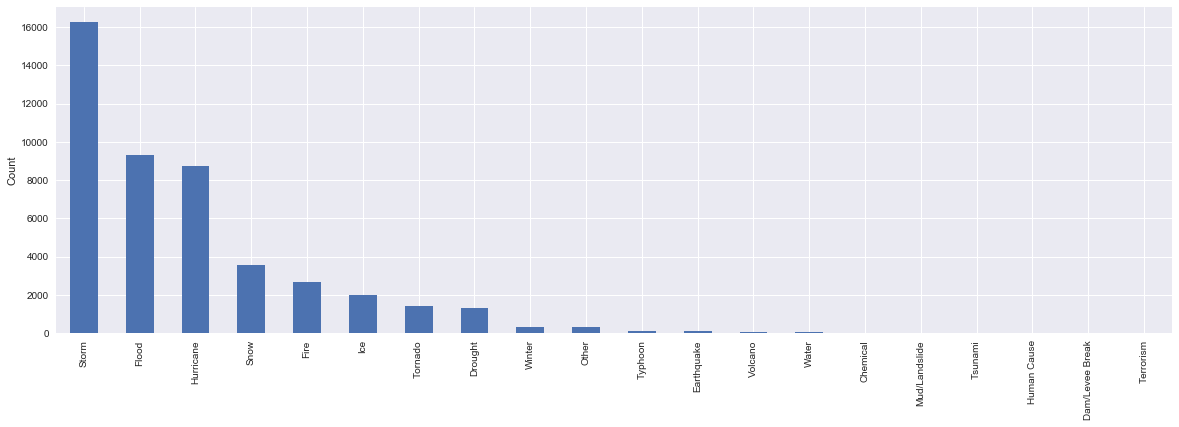

In [5]:
# lets take a look at all the disaster types that are included

data.Disaster_Type.value_counts().plot(kind='bar',figsize=(20,6))
plt.ylabel('Count')

Text(0, 0.5, 'Count')

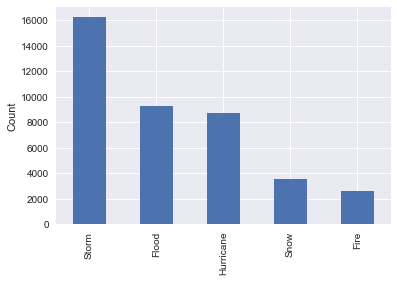

In [6]:
# what are the top 5 disasters that took place since 1953

data.Disaster_Type.value_counts().head(5).plot(kind='bar')
plt.ylabel('Count')

# looks like storm is the #1 disaster

Text(0, 0.5, 'Count')

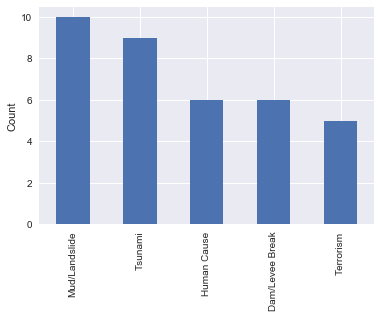

In [7]:
# What are the least 5 disasters that took place since 1953
data.Disaster_Type.value_counts().tail(5).plot(kind='bar')
plt.ylabel('Count')

#looks like Terrorism is at the bottom as a disaster

Text(0, 0.5, 'Total Count of Disasters')

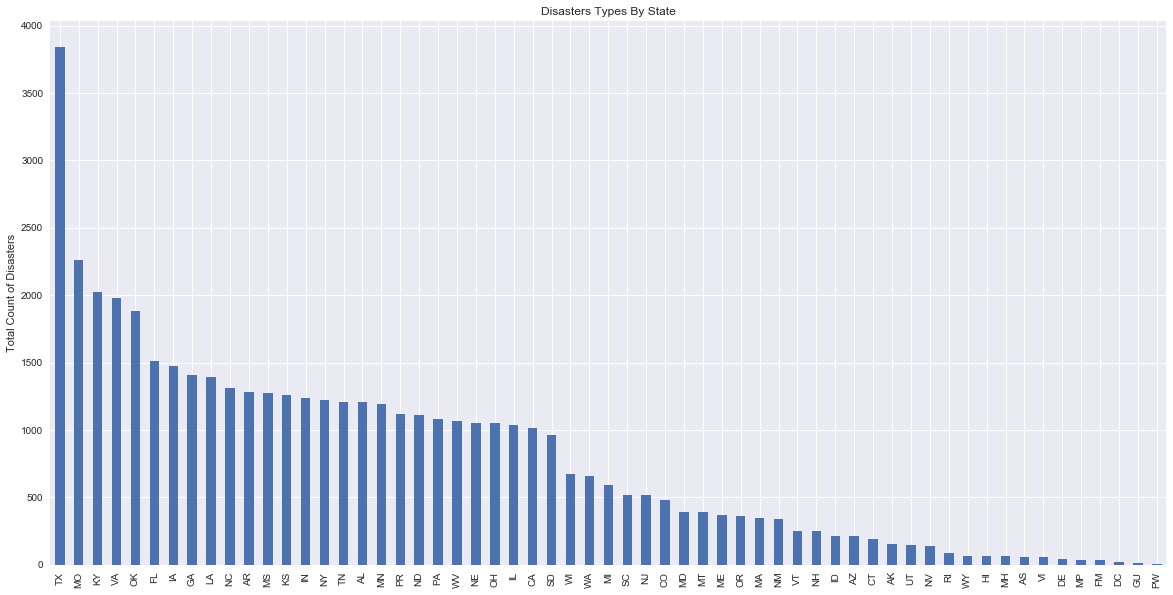

In [8]:
# Let's look at the disasters by states

data.State.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Disasters Types By State')
plt.ylabel('Total Count of Disasters')


# Looks like TX has the highest amount of disaster. Would be interesting to know why that is
# what's also interesting is that we have more than 50 staes here - so I leaned the abbreviation 
# of the other states that are outside the 50 states but still within the US

# PW, 
# FM
# AS -American Samoa
# GU - Guam
# MP - Northern Mariana Islands



In [9]:
# EXTRA TRial material

# - What are the top 10 states with the highest amount of disasters since 1954
#    - What are the top 5 disasters in those states
    
#state = data.groupby(['State','Disaster_Type'])['Disaster_Title'].count()
#state = newpd.groupby('State').count()[['Disaster_Type']]

#Make the graph bigger figure, size parameter -> figsize=(20,10)

#state = data.State.value_counts()
#state

Text(0, 0.5, 'Count')

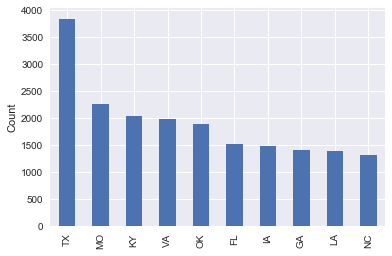

In [10]:
# What are the top 10 states with disasters
data.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

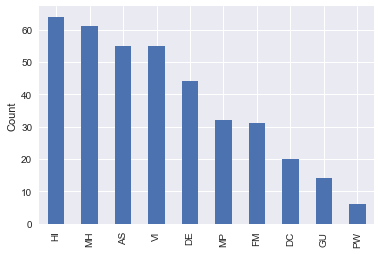

In [11]:
# What are the least 10 states with disasters
data.State.value_counts().tail(10).plot(kind='bar')
plt.ylabel('Count')

In [12]:
# lets look at just the hurricane data 

hurricane_df = data[data['Disaster_Type'] == 'Hurricane']

#hurricane_df
#data[data['Disaster_Type'] == 'Storm']
# data[data['Disaster_Type'] == 'Hurricane'].shape 

# 8764, 14 out of the ~46K data is hurricane

Text(0, 0.5, 'Count')

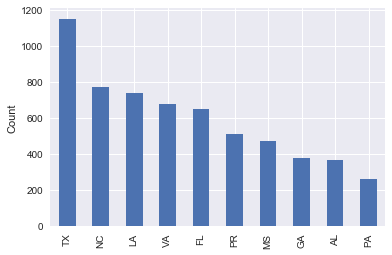

In [13]:
# top 10 states with hurricane as disaster - looks like TX is still the winner but NC is the 2nd one when it comes to
# Hurricane as the disaster
hurricane_df.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

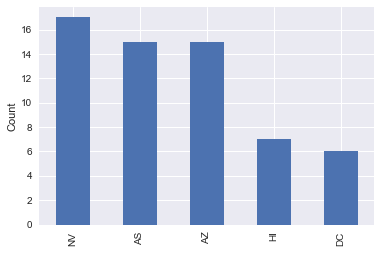

In [14]:
# the states getting least effected by Hurricane

hurricane_df.State.value_counts().tail(5).plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Total Count of Disasters by Disaster Titles')

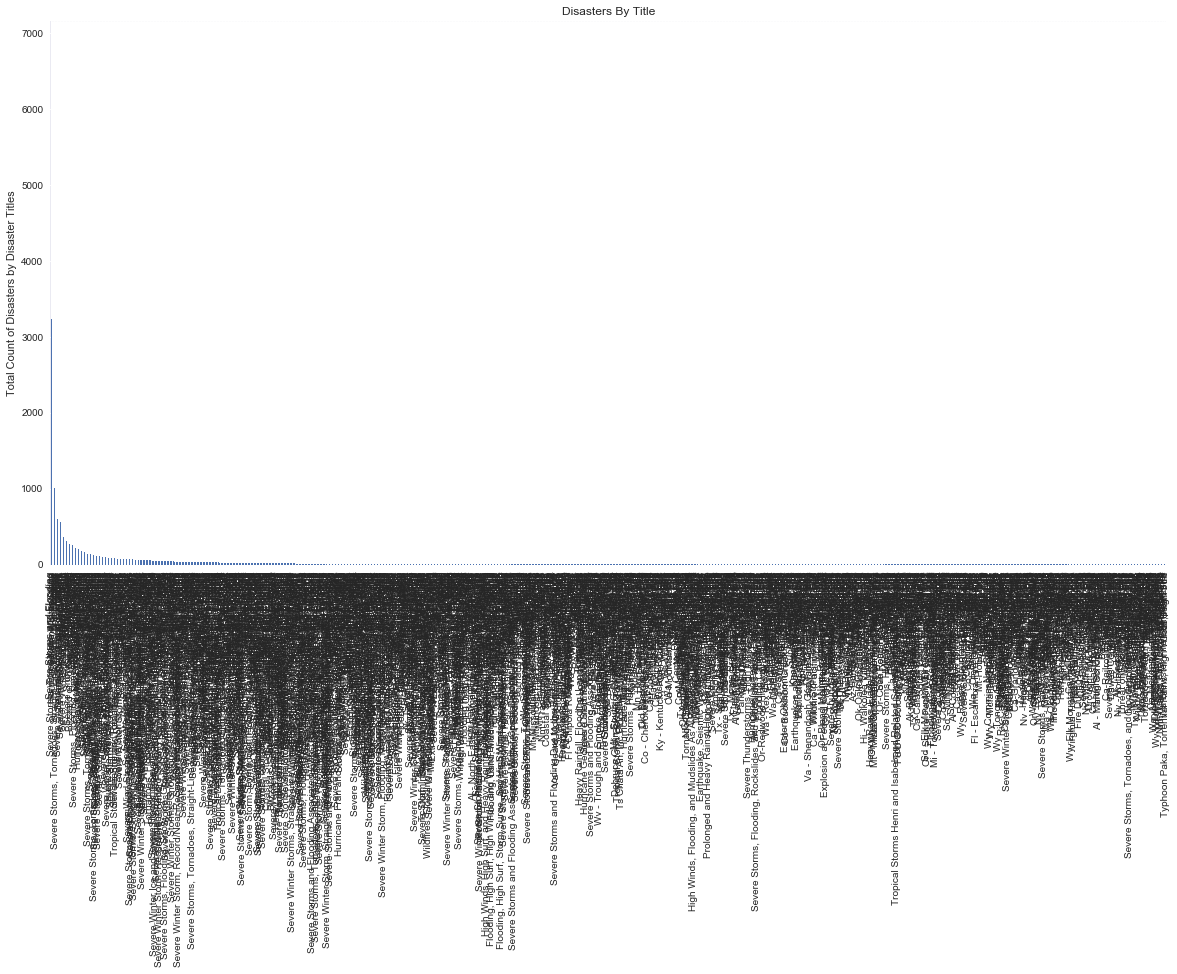

In [15]:
# all disaster title

# We could get the first 15.
#data.Disaster_Title.value_counts().head(15).plot(kind='bar', figsize=(20,10))
data.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Disasters By Title')
plt.ylabel('Total Count of Disasters by Disaster Titles')

# So it looks like the disaster titles are repeated a lot. Should take a closer look at it.
# and this is where I find out that the disaster title column is not as clean as it should be

In [16]:
# What are the top 5 disasters in those states

# breakdown of diasters for the top 5 states

# breakdown of diasters by states
#data.groupby(['State','Disaster_Type'])['Disaster_Title'].count()
#data.groupby('State').count()[['Disaster_Type']]

#data

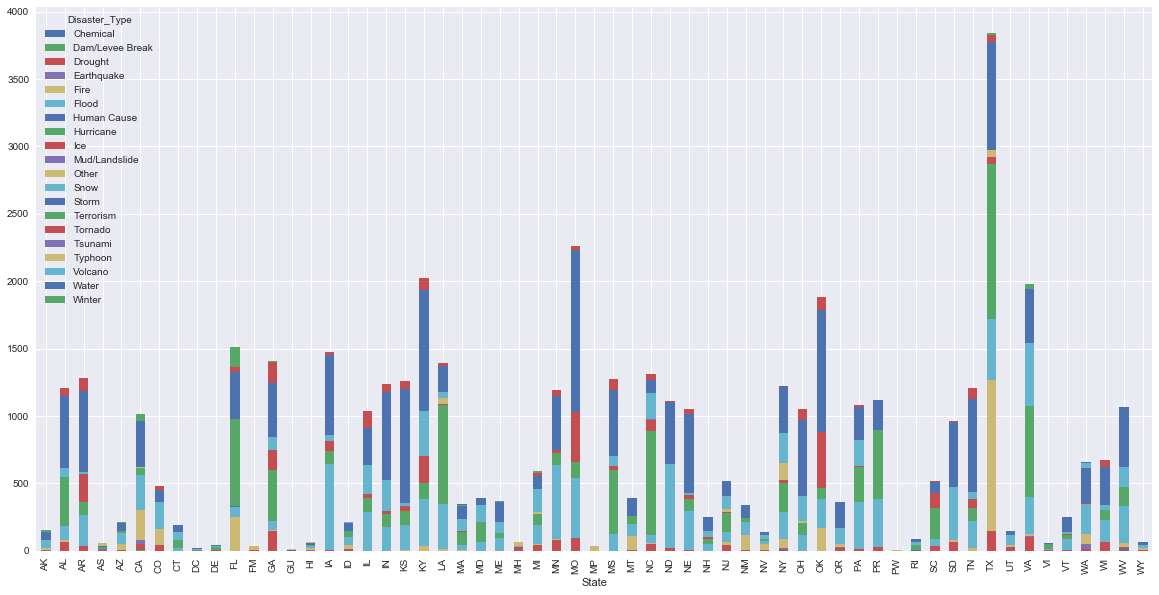

In [17]:
# Breakdown of disaster types by states...
data.groupby(['State','Disaster_Type']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

2 - Ask and answer analytic questions. 
* Ask three analytic questions and answer each one with a combination of statistics and visualizations. 
* These analytic questions can focus on individuals behaviors or comparisons of the population.

Question 1. What is the trend of the FEMA disaster declaration through the years? Has it gone up? Gone down?

In [18]:
# lets look at the years of disasters 

#data['End_Date'] = pd.to_datetime(data['End_Date'])
#data['Start_Date'] = pd.to_datetime(data['Start_Date'])
#data['Declaration_Date'] = pd.to_datetime(data['Declaration_Date'])
#data['Close_Date'] = pd.to_datetime(data['Close_Date'])

# Let’s take a look at the number of times FEMA has deployed resources by year

data['Start_year'] = data['Start_Date'].dt.year
data['End_year'] = data['End_Date'].dt.year
data['Declaration_year'] = data['Declaration_Date'].dt.year
data['Dec_Close_year'] = data['Close_Date'].dt.year

data

,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,...,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program,Start_End_duration,End_Close_duration,Declaration_Close_duration,Start_year,End_year,Declaration_year,Dec_Close_year
0,DR-1,Disaster,1953-05-02,GA,NaN,Tornado,Tornado,1953-05-02,1953-05-02,1954-06-01,...,No,Yes,Yes,1.0,396.0,396.0,1953,1953.0,1953,1954.0
1,DR-2,Disaster,1953-05-15,TX,NaN,Tornado,Tornado and Heavy Rainfall,1953-05-15,1953-05-15,1958-01-01,...,No,Yes,Yes,1.0,1693.0,1693.0,1953,1953.0,1953,1958.0
2,DR-3,Disaster,1953-05-29,LA,NaN,Flood,Flood,1953-05-29,1953-05-29,1960-02-01,...,No,Yes,Yes,1.0,2440.0,2440.0,1953,1953.0,1953,1960.0
3,DR-4,Disaster,1953-06-02,MI,NaN,Tornado,Tornado,1953-06-02,1953-06-02,1956-02-01,...,No,Yes,Yes,1.0,975.0,975.0,1953,1953.0,1953,1956.0
4,DR-5,Disaster,1953-06-06,MT,NaN,Flood,Floods,1953-06-06,1953-06-06,1955-12-01,...,No,Yes,Yes,1.0,909.0,909.0,1953,1953.0,1953,1955.0
5,DR-6,Disaster,1953-06-09,MI,NaN,Tornado,Tornado,1953-06-09,1953-06-09,1956-03-30,...,No,Yes,Yes,1.0,1026.0,1026.0,1953,1953.0,1953,1956.0
6,DR-7,Disaster,1953-06-11,MA,NaN,Tornado,Tornado,1953-06-11,1953-06-11,1956-06-01,...,No,Yes,Yes,1.0,1087.0,1087.0,1953,1953.0,1953,1956.0
7,DR-8,Disaster,1953-06-11,IA,NaN,Flood,Flood,1953-06-11,1953-06-11,1955-11-01,...,No,Yes,Yes,1.0,874.0,874.0,1953,1953.0,1953,1955.0
8,DR-9,Disaster,1953-06-19,TX,NaN,Flood,Flood,1953-06-19,1953-06-19,1958-01-01,...,No,Yes,Yes,1.0,1658.0,1658.0,1953,1953.0,1953,1958.0
9,DR-11,Disaster,1953-07-02,NH,NaN,Fire,Forest Fire,1953-07-02,1953-07-02,1956-02-01,...,No,Yes,Yes,1.0,945.0,945.0,1953,1953.0,1953,1956.0


Text(0, 0.5, 'Total Count of Declaration')

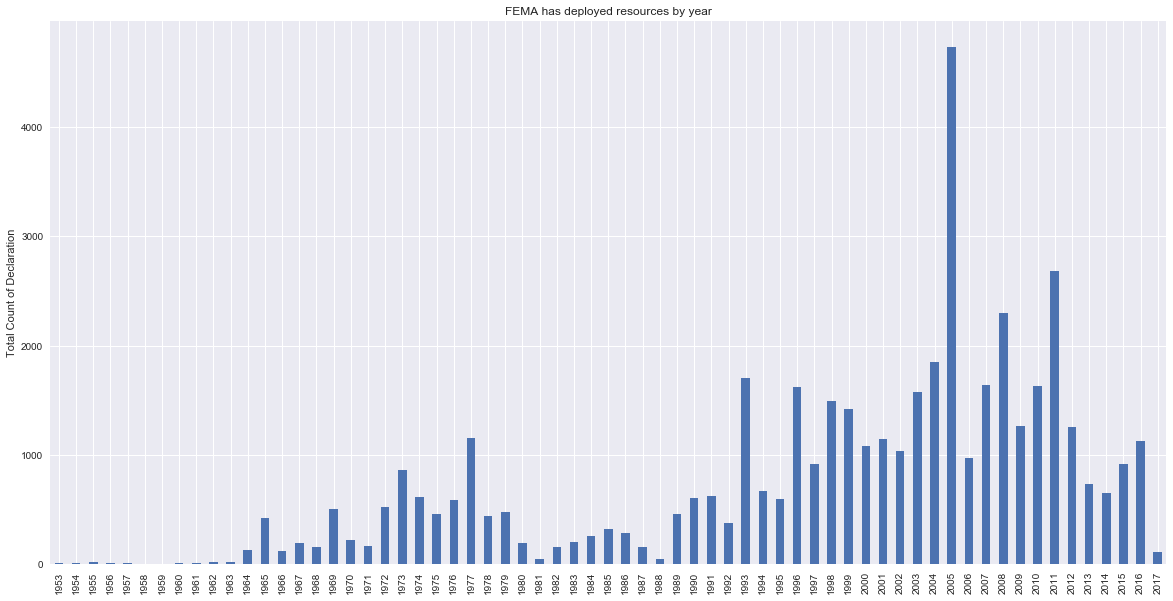

In [19]:
# Let’s take a look at the number of times FEMA has deployed resources by year
# this would be Declaration_year


#data.Declaration_year.value_counts().sort_index()

data.Declaration_year.value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.title('FEMA has deployed resources by year')
plt.ylabel('Total Count of Declaration')

In [20]:
fema_by_year = data.Declaration_year.value_counts().sort_index()
#fema_by_year.index
#fema_by_year.values

fema_by_year

1953      13
1954      17
1955      18
1956      16
1957      16
1958       7
1959       7
1960      12
1961      12
1962      22
1963      20
1964     136
1965     429
1966     120
1967     197
1968     162
1969     505
1970     221
1971     171
1972     526
1973     863
1974     619
1975     460
1976     586
1977    1160
1978     440
1979     476
1980     200
1981      52
1982     158
        ... 
1988      51
1989     462
1990     610
1991     623
1992     379
1993    1705
1994     676
1995     602
1996    1622
1997     919
1998    1497
1999    1419
2000    1082
2001    1148
2002    1040
2003    1574
2004    1853
2005    4736
2006     975
2007    1640
2008    2300
2009    1265
2010    1635
2011    2680
2012    1261
2013     737
2014     654
2015     916
2016    1132
2017     110
Name: Declaration_year, dtype: int64

ValueError: x and y must be the same size

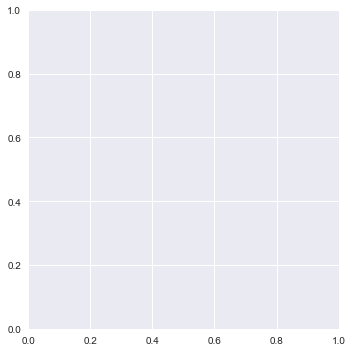

In [23]:

g = sns.lmplot(y=fema_by_year.values, 
               x=fema_by_year.index,
               data=fema_by_year, # Data.
               fit_reg=True, 
               scatter_kws={'alpha':0.4}, 
               palette='pastel')
g.set_ylabels("Total Counts")
g.set_xlabels("FEMA Declartion by YEAR")
plt.title('Scatterplot with regression line: FEMA declaration by year')
plt.show()

Quesstion 2. According to this dataset, Hurricane is the 3rd among the top disasters after Storm and flood. Storm themselves can have a chance to become hurricanes and flooding may occure from hurricanes. 
* 

- How many named hurricane have we encountered since 1953
 - what is the longest hurricane 
    - distribution of the hurricanes by plotting it on a histogram
    - mean and std deviation
 - look into the various hurricanes
 - describe


In [ ]:
#hurricane_df

Text(0, 0.5, 'Count')

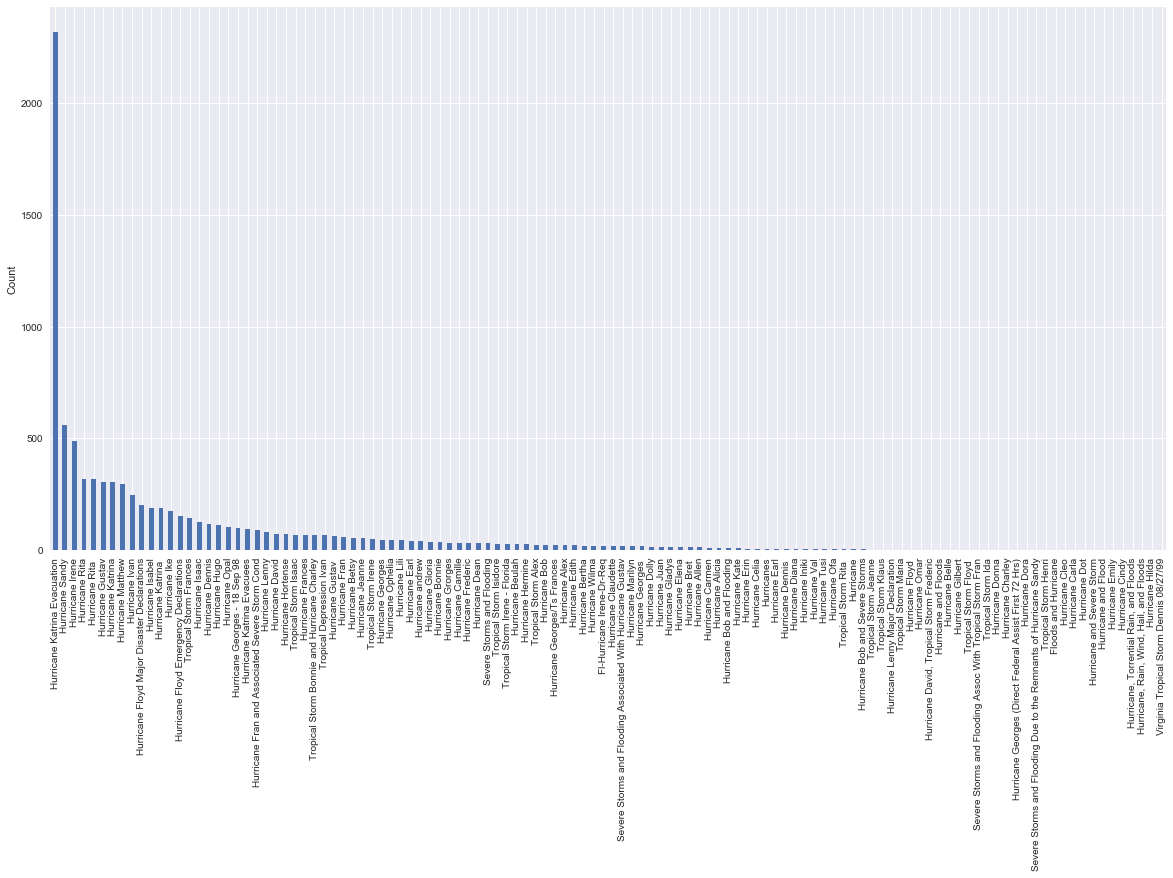

In [27]:
# distribution of the hurricanes by plotting it on a histogram

hurricane_df.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

# this data does not seem very interesting because as you can see from the results that the data may not be correct
# The max number says hurricane Katrina evacuation - which is strange because why would the evacuation data be there 


### comment about the data inconsistencies

## https://courses.thinkful.com/dsbc-data-vis-1-v1/checkpoint/4 to clean up the data for example Katrina, Rita etc should be cleaned up

## Then try to graph


/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

count    8764.000000
mean       22.594363
std        15.223689
min         1.000000
25%        10.000000
50%        21.000000
75%        34.000000
max        68.000000
Name: Duration, dtype: float64


/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/tparveen/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


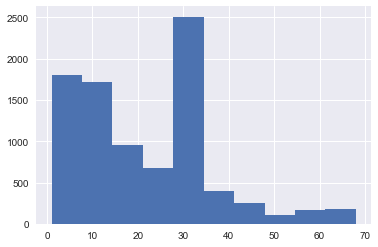

In [26]:
#Get the days that the hurricane lasted - then find the mean, std dev


#hurricane_df.groupby(['State','Disaster_Title'])['Disaster_Title'].count()

hurricane_df['End_Date'] = pd.to_datetime(hurricane_df['End_Date'])
hurricane_df['Start_Date'] = pd.to_datetime(hurricane_df['Start_Date'])

#hurricane_df.info()


hurricane_df['Duration'] = hurricane_df['End_Date'] - hurricane_df['Start_Date']
hurricane_df['Duration'] = hurricane_df['Duration']/np.timedelta64(1,'D')

hurricane_df['Duration'] = hurricane_df['Duration'].add(1)

#print(hurricane_df)

# from difflib import SequenceMatcher
#def similar(a, b): return SequenceMatcher(None, a, b).ratio(

print(hurricane_df['Duration'].describe())
#hurricane_df['Duration'].plot(kind='bar', figsize=(20,10))
#plt.ylabel('Count')

plt.hist(hurricane_df['Duration'])
plt.show()


/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Text(0, 0.5, 'Count')

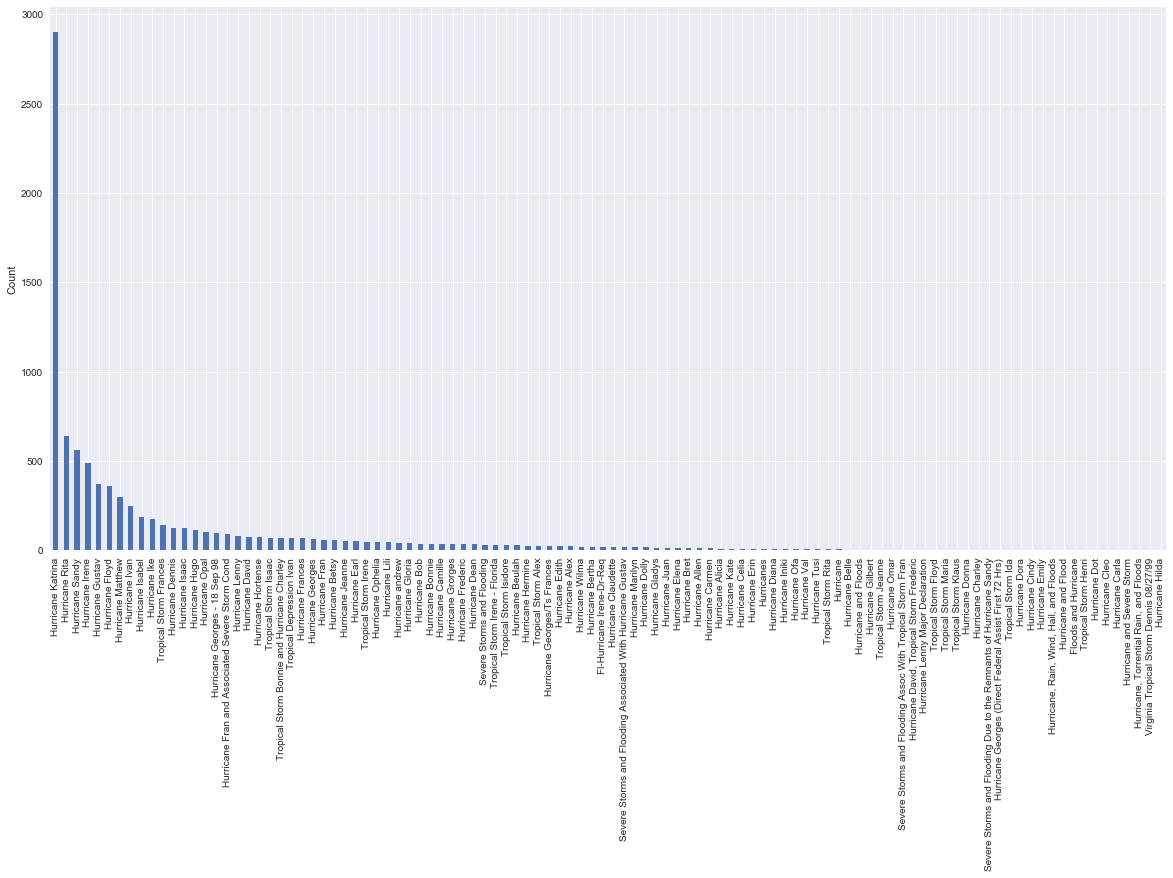

In [33]:
#df[''new_column] = [' '.join(item.split(' ')[0:2] for item in df['column']]
# comparing package in python

#hurricane_title_df.replace({'Disaster_Title':r'^Hurricanes Katrina. $'}, {'Disaster_Title':'Hurricane Katrina'}, regex=True)

#hurricane_title_df = hurricane_df


#hurricane_title_df['hurricane_titles'] = [' '.join(item.split(' ')[0:2] for item in hurricane_title_df['Disaster_Title']]
#hurricane_title_df
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.strip()

hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Katrina.*','Hurricane Katrina')
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Floyd.*','Hurricane Floyd')
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Bob.*','Hurricane Bob')

#hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'^Irene.*','Hurricane Irene')

#hurricane_title_df
#print(hurricane_df['Disaster_Title'] == 'Hurricane Katrina')




hurricane_df.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

In [ ]:
# What was the higest and lowest amount of hurricanes that tool place? 

#state = newpd.groupby('State').count()[['Disaster_Type']]
#state.Disaster_Type.max() #1151
#state.Disaster_Type.min() # 6

In [ ]:
#hurricane_df.Disaster_Title.value_counts().head(20).plot(kind='bar', figsize=(20,10))
#plt.ylabel('Count')

3 - Propose further research. 
* Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. 
* Just like your earlier questions, your research proposal should present one or more clear questions. 
* Then you should describe the techniques you would apply in order to arrive at an answer.



- What is the most likely disaster event that I should prepare for? If I were an insurance company, what diaster would I be looking at to predict my business?


An example: https://medium.com/@jasoncrease/was-2016-especially-dangerous-for-celebrities-79d79b9fae02#.zd8hv5jge

Rubric for grading: https://docs.google.com/spreadsheets/d/18Z0aaE6mWIhUomdzfVZqYeAzw51-iEz_lGHIPwM-3ls/edit#gid=0